### 1. LINEAR REGRESSION ON BOSTON HOUSING DATASET

In [1]:
import numpy as np
from sklearn import preprocessing as pr
from sklearn.model_selection import train_test_split as tts 
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
data=np.loadtxt("boston_train.csv",delimiter=",")

In [3]:
data

array([[-0.40784991, -0.48772236, -1.2660231 , ...,  0.41057102,
        -1.09799011, 37.9       ],
       [-0.40737368, -0.48772236,  0.24705682, ...,  0.29116915,
        -0.52047412, 21.4       ],
       [ 0.1251786 , -0.48772236,  1.01599907, ..., -3.79579542,
         0.89107588, 12.7       ],
       ...,
       [-0.40831101, -0.48772236,  0.24705682, ...,  0.33206621,
        -0.33404299, 20.8       ],
       [-0.41061997, -0.48772236, -1.15221381, ...,  0.203235  ,
        -0.74475218, 22.6       ],
       [ 0.34290895, -0.48772236,  1.01599907, ...,  0.38787479,
        -1.35871335, 50.        ]])

In [4]:
data.shape

(379, 14)

In [5]:
x=data[:,:13]                   #input variables (13 variables)

y=data[:,13]                    #output

N=data.shape[1]                          #no. of variables(c=m14)
m=data.shape[0]                          #no. of inputs

scaler=pr.StandardScaler()
scaler.fit(x)
x=scaler.transform(x)

temp=np.ones(m)
x_nplus1=temp.reshape(m,1)
x=np.append(x,x_nplus1,axis=1)

In [6]:
X_train, X_test, Y_train, Y_test = tts(x, y, test_size = 0.2)

In [7]:
y.shape

(379,)

In [8]:
def update(i, M,alpha):

    sigma_val=np.dot(X_train,M)                     #sigma(m[i]x[i][j]) for j=1 to N
    sigma_val=Y_train-sigma_val    
    total_sigma=np.dot(X_train.transpose(),sigma_val)     #[sigma(x[i][j]) for i=1 to m]*[sigma_val]
    error = (0.5/m) * (sigma_val.sum())**2
    print('for iteration {}, error is {}'.format(i, error))
    M=M+2*(alpha/m)*total_sigma
    
    return M
    

def gradient_descent():
    
    M=np.random.rand(N)
    alpha=0.01
    iterations=2000
    
    for i in range(iterations):
        M=update(i + 1, M,alpha)
        
    return M

In [9]:
def predictions():
    
    
    M=gradient_descent()
    Y_pred=np.dot(X_test,M)
    
    return Y_pred

In [10]:
Y_pred = predictions()

for iteration 1, error is 56987.095824230375
for iteration 2, error is 55236.56660049054
for iteration 3, error is 53534.074495716595
for iteration 4, error is 51878.98739575861
for iteration 5, error is 50270.59086932802
for iteration 6, error is 48708.10230603174
for iteration 7, error is 47190.68333267389
for iteration 8, error is 45717.45069898906
for iteration 9, error is 44287.485804046235
for iteration 10, error is 42899.84301651905
for iteration 11, error is 41553.55692571646
for iteration 12, error is 40247.648645572044
for iteration 13, error is 38981.13128056598
for iteration 14, error is 37753.01465067509
for iteration 15, error is 36562.309361789594
for iteration 16, error is 35408.030298490216
for iteration 17, error is 34289.19960753817
for iteration 18, error is 33204.8492327967
for iteration 19, error is 32154.023055486865
for iteration 20, error is 31135.778687599057
for iteration 21, error is 30149.188960861335
for iteration 22, error is 29193.34314883685
for iterati

In [11]:
a = ((Y_pred - Y_test)**2).sum()
b = ((Y_test - Y_test.mean())**2).sum()
r2 = 1 - (a/b)
r2

0.671078739866718

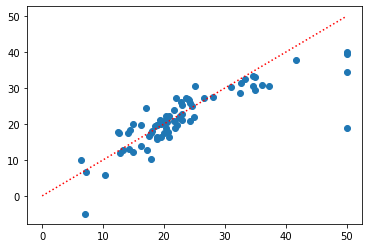

In [12]:
plt.scatter(Y_test, Y_pred)
x=np.linspace(0,50,5)
plt.plot(x, x, 'r:')

### 2. LOGISTIC REGRESSION ON BREAST CANCER DATASET

In [13]:
cancer=datasets.load_breast_cancer()
m=cancer.data.shape[0]
N=cancer.data.shape[1] + 1

x=cancer.data
temp=np.ones(m)
x_nplus1=temp.reshape(m,1)
x=np.append(x,x_nplus1,axis=1)

y=cancer.target

In [14]:
x_train,x_test,y_train,y_test=tts(x,y, test_size = 0.2)

In [15]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


def update(i,M,alpha):
    
    temp=np.dot(x_train,M)          #m1x1+m2x2....
    h_x=sigmoid(temp)
    sigma_val=y_train-h_x
    total_sigma=np.dot(x_train.transpose(),sigma_val)    #(yi-(m1x1+m2x2...)*x[i][j])
    
    M=M+(alpha/m)*total_sigma
    
    return M
    
def gradient_descent():
        
        alpha=0.01
        iterations=1000
        M=np.zeros(N)
        
        for i in range(iterations):
            M=update(i,M,alpha)
            
        return M
    
def predictions():
    
    M=gradient_descent()
    h_x=np.dot(x_test,M)
    h_x=sigmoid(h_x)
    y_pred =  (h_x >= 0.5).astype(int)
            
    return y_pred

In [16]:
y_pred = predictions()

<ipython-input-15-9b56f481de4e>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


In [17]:
def score(y_pred,y_test):
    u= (y_pred == y_test).sum()
    v= y_pred.shape[0]
    
    return u/v

score(y_pred,y_test)

0.9035087719298246